In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Extracting the FMNIST Dataset

In [ ]:
! cp /content/gdrive/MyDrive/SML_Assignment-4/fminst.zip .
! unzip fminst.zip -d fminst/

In [ ]:
! cp /content/gdrive/MyDrive/SML_Assignment-4/mnist.zip .
! unzip mnist.zip -d mnist/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Visualizing one image of the FMNIST Dataset

(60000, 28, 28)
(10000, 28, 28)
Label : 5


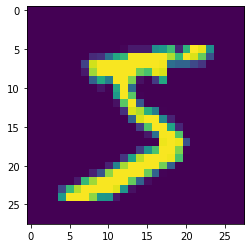

In [ ]:
import gzip
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x2 = images_file_read("mnist/mnist/train-images-idx3-ubyte.gz")
print(train_x2.shape)
train_y2 = labels_file_read("mnist/mnist/train-labels-idx1-ubyte.gz")
test_x2 = images_file_read("mnist/mnist/t10k-images-idx3-ubyte.gz")
print(test_x2.shape)
test_y2 = labels_file_read("mnist/mnist/t10k-labels-idx1-ubyte.gz")
plt.imshow(train_x2[0])
print("Label :" ,  train_y2[0])

In [ ]:
import pandas as pd
df_train = pd.read_csv("fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("fminst/fashion-mnist_test.csv")
label = {0:"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}

In [ ]:
train_x = np.array(df_train.iloc[:,1:]).reshape(df_train.shape[0],28,28)
train_y = np.array(df_train.iloc[:,0])
test_x = np.array(df_test.iloc[:,1:]).reshape(df_test.shape[0],28,28)
test_y = np.array(df_test.iloc[:,0])

Label : Ankle boot


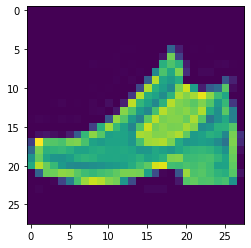

In [ ]:
plt.imshow(train_x[1])
print("Label :" ,  label[train_y[1]])

In [ ]:
print(train_x.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


In [ ]:
val_x = train_x[0:10000,:,:]
val_y = train_y[0:10000]

In [ ]:
train_x = train_x[10000:,:,:]
train_y = train_y[10000:]

In [ ]:
print(train_x.shape)
print(train_y.shape)

(50000, 28, 28)
(50000,)


In [ ]:
print(val_x.shape)
print(val_y.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print(test_x.shape)
print(test_y.shape)

(10000, 28, 28)
(10000,)


Normalizing and Centralizing the training data

In [ ]:
train_x = (train_x / 255) - 0.5
test_x = (test_x / 255) - 0.5
val_x = (val_x / 255) - 0.5

In [ ]:
train_x = train_x.reshape((-1, 784))
test_x = test_x.reshape((-1, 784))
val_x = val_x.reshape((-1, 784))

In [ ]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Activation,Dropout,BatchNormalization
from keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

Preparing the model architechure as per the requirement

In [ ]:
model = Sequential() # create model
model.add(Dense(64, input_dim=784, trainable=True,activation='relu', use_bias=True, 
                kernel_initializer=initializers.RandomNormal(mean=0., stddev=1.))) 
# model.add(Dropout(0.5))
model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(10, trainable=True, activation='softmax'))

Adding SGD Optimizer to the model

In [ ]:
sgd = optimizers.SGD(learning_rate=0.1, momentum=0.9)

In [ ]:
model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4096      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,242
Trainable params: 55,114
Non-trainable params: 128
__________________________________________________

Training the model

In [ ]:
mc = ModelCheckpoint('bestModel.h5', monitor='val_accuracy', mode='max', 
                     verbose=1, save_best_only=True)
history=model.fit(
  train_x,
  to_categorical(train_y),
  validation_data=(val_x, to_categorical(val_y)),  
  epochs=30,
  batch_size=512,
  shuffle = True,
  callbacks=[mc],
)

Epoch 1/30
95/98 [============================>.] - ETA: 0s - loss: 0.7792 - accuracy: 0.7200
Epoch 1: val_accuracy improved from -inf to 0.70430, saving model to bestModel.h5
98/98 [==============================] - 3s 19ms/step - loss: 0.7747 - accuracy: 0.7215 - val_loss: 0.8172 - val_accuracy: 0.7043
Epoch 2/30
97/98 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.8006
Epoch 2: val_accuracy improved from 0.70430 to 0.78250, saving model to bestModel.h5
98/98 [==============================] - 2s 16ms/step - loss: 0.5458 - accuracy: 0.8007 - val_loss: 0.5909 - val_accuracy: 0.7825
Epoch 3/30
96/98 [============================>.] - ETA: 0s - loss: 0.5006 - accuracy: 0.8177
Epoch 3: val_accuracy improved from 0.78250 to 0.80090, saving model to bestModel.h5
98/98 [==============================] - 1s 13ms/step - loss: 0.5006 - accuracy: 0.8176 - val_loss: 0.5454 - val_accuracy: 0.8009
Epoch 4/30
98/98 [==============================] - ETA: 0s - loss: 0.4754 -

Plotting Epoch-wise Training and Validation Loss

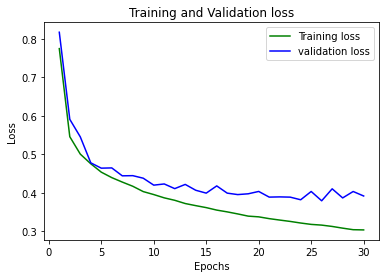

In [ ]:
loss_train = history.history["loss"]
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
saved_model = load_model("bestModel.h5")
scores = saved_model.evaluate(
  test_x,
  to_categorical(test_y)
)

print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8676
Test accuracy: 0.8676000237464905
